In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import matthews_corrcoef

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [5]:
df = pd.read_csv('cleaned_5250.csv')
df

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,5233.0,2167.168737,3245.522087,4.000000,389.000000,1371.000000,2779.000000,27727.00
stellar_magnitude,5089.0,12.683738,3.107571,0.872000,10.939000,13.543000,15.021000,44.61
discovery_year,5250.0,2015.732190,4.307336,1992.000000,2014.000000,2016.000000,2018.000000,2023.00
mass_multiplier,5227.0,6.434812,12.972727,0.020000,1.804000,4.170140,8.000000,752.00
radius_multiplier,5233.0,1.015121,0.603479,0.200000,0.325000,1.120000,1.410000,6.90
orbital_radius,4961.0,6.962942,138.673600,0.004400,0.053000,0.102800,0.286000,7506.00
orbital_period,5250.0,479.150875,16804.445318,0.000274,0.012594,0.034497,0.144216,1101369.90
eccentricity,5250.0,0.063568,0.141424,-0.520000,0.000000,0.000000,0.060000,0.95


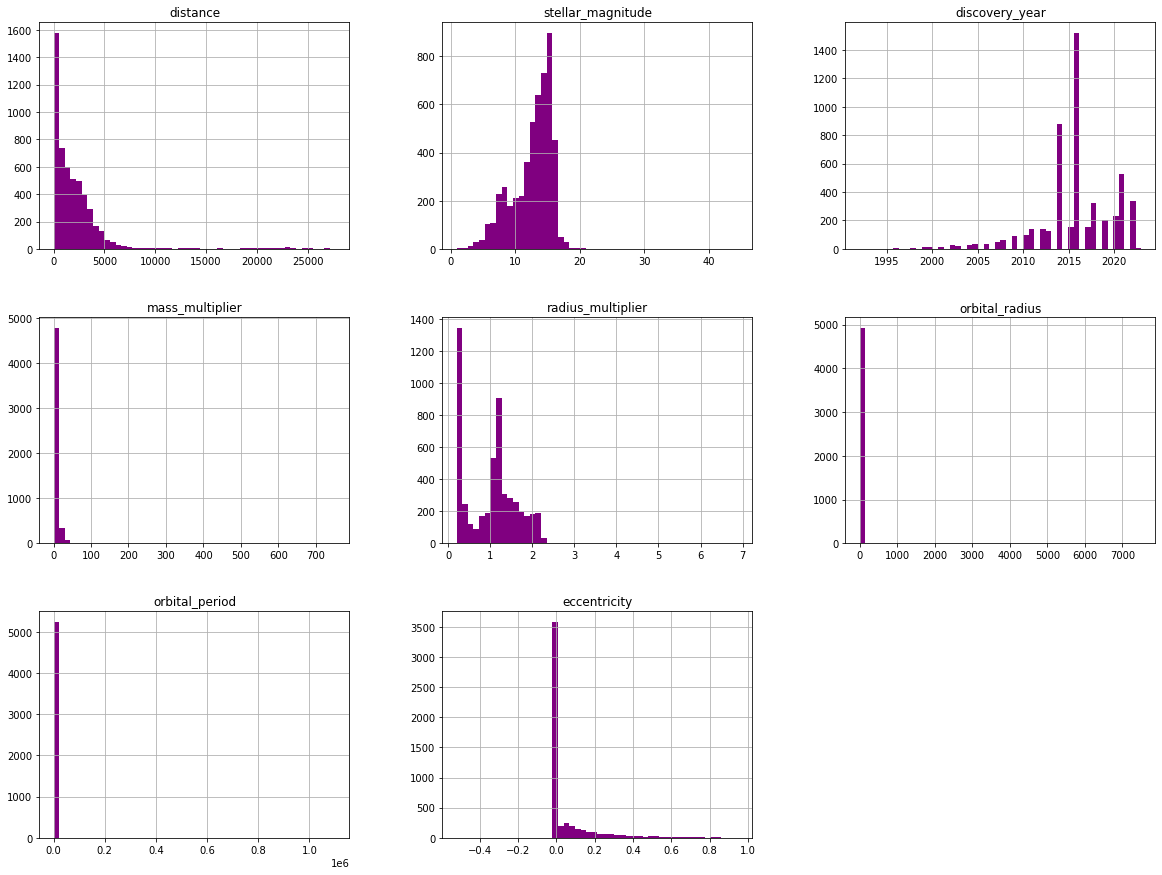

In [7]:
df.hist(bins=50,figsize=(20,15), color='purple')
plt.show()

In [8]:
df["planet_type"].value_counts()

planet_type
Neptune-like    1825
Gas Giant       1630
Super Earth     1595
Terrestrial      195
Unknown            5
Name: count, dtype: int64

<Axes: xlabel='planet_type', ylabel='count'>

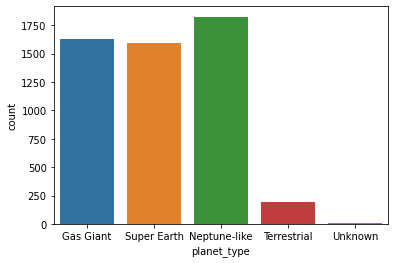

In [9]:
sns.countplot(x='planet_type', data=df)

In [35]:
df = df[df["planet_type"] != "Unknown"] #We remove unknown values because they have no effect.

In [11]:
df["planet_type"].value_counts()

planet_type
Neptune-like    1825
Gas Giant       1630
Super Earth     1595
Terrestrial      195
Name: count, dtype: int64

In [12]:
df.isnull().sum()

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       18
mass_wrt              18
radius_multiplier     12
radius_wrt            12
orbital_radius       286
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64

In [13]:
# Drop irrelevant columns
df = df.drop(labels=['radius_wrt', 'mass_wrt', 'discovery_year','name','detection_method'], axis='columns')
df.replace({'planet_type':{ 'Neptune-like':0,'Gas Giant':1 ,'Super Earth':2, 'Terrestrial':3}}, inplace= True)
df

,distance,stellar_magnitude,planet_type,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
0,304.0,4.72307,1,19.40000,1.080,1.290000,0.892539,0.23
1,409.0,5.01300,1,14.74000,1.090,1.530000,1.400000,0.08
2,246.0,5.23133,1,4.80000,1.150,0.830000,0.508693,0.00
3,58.0,6.61935,1,8.13881,1.120,2.773069,4.800000,0.37
4,69.0,6.21500,1,1.78000,1.200,1.660000,2.200000,0.68
...,...,...,...,...,...,...,...,...
5245,764.0,10.52100,1,0.70900,1.373,0.044210,0.007940,0.04
5246,357.0,10.88500,1,6.30000,1.140,115.000000,1176.500000,0.00
5247,12.0,12.07400,3,0.70000,0.913,0.016340,0.005476,0.06
5248,12.0,12.07400,2,1.14000,1.050,0.021560,0.008487,0.00


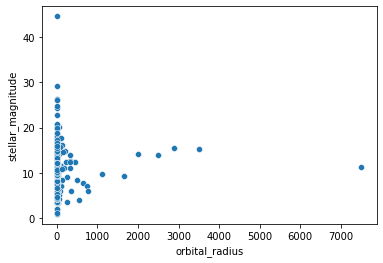

In [15]:
sns.scatterplot(x ='orbital_radius' , y = 'stellar_magnitude' , data = df);

In [16]:
columns_to_clean = ['distance', 'stellar_magnitude', 'mass_multiplier', 'radius_multiplier', 'orbital_radius']
df.dropna(subset=columns_to_clean, inplace=True)
df

,distance,stellar_magnitude,planet_type,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
0,304.0,4.72307,1,19.40000,1.080,1.290000,0.892539,0.23
1,409.0,5.01300,1,14.74000,1.090,1.530000,1.400000,0.08
2,246.0,5.23133,1,4.80000,1.150,0.830000,0.508693,0.00
3,58.0,6.61935,1,8.13881,1.120,2.773069,4.800000,0.37
4,69.0,6.21500,1,1.78000,1.200,1.660000,2.200000,0.68
...,...,...,...,...,...,...,...,...
5245,764.0,10.52100,1,0.70900,1.373,0.044210,0.007940,0.04
5246,357.0,10.88500,1,6.30000,1.140,115.000000,1176.500000,0.00
5247,12.0,12.07400,3,0.70000,0.913,0.016340,0.005476,0.06
5248,12.0,12.07400,2,1.14000,1.050,0.021560,0.008487,0.00


In [17]:
df["planet_type"].value_counts()

planet_type
0    1670
2    1477
1    1435
3     183
Name: count, dtype: int64

In [18]:
display(df.corr().style.background_gradient(cmap='coolwarm',axis = None))
print(df.isnull().sum())

,distance,stellar_magnitude,planet_type,mass_multiplier,radius_multiplier,orbital_radius,orbital_period,eccentricity
distance,1.000000,0.619741,-0.085153,0.035827,-0.072653,-0.039565,-0.024429,-0.311274
stellar_magnitude,0.619741,1.000000,0.035407,-0.022076,-0.059217,-0.014660,-0.000710,-0.477936
planet_type,-0.085153,0.035407,1.000000,-0.211666,0.572887,-0.002159,-0.001104,-0.060033
mass_multiplier,0.035827,-0.022076,-0.211666,1.000000,-0.053314,0.020781,0.007251,0.012410
radius_multiplier,-0.072653,-0.059217,0.572887,-0.053314,1.000000,0.013993,0.005585,0.027955
orbital_radius,-0.039565,-0.014660,-0.002159,0.020781,0.013993,1.000000,0.952653,-0.009218
orbital_period,-0.024429,-0.000710,-0.001104,0.007251,0.005585,0.952653,1.000000,-0.012084
eccentricity,-0.311274,-0.477936,-0.060033,0.012410,0.027955,-0.009218,-0.012084,1.000000


distance             0
stellar_magnitude    0
planet_type          0
mass_multiplier      0
radius_multiplier    0
orbital_radius       0
orbital_period       0
eccentricity         0
dtype: int64


In [19]:
X = df.drop('planet_type',axis=1)
Y = df['planet_type']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
print(X.shape)
print(Y.shape)

(4765, 7)
(4765,)


# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1, n_jobs=-1).fit(X_train,Y_train)

In [22]:
Y_pred1 = clf.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.p

[[265  13  74   1]
 [ 28 183  47  12]
 [ 46  47 190  16]
 [  2   9   8  12]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       353
           1       0.73      0.68      0.70       270
           2       0.60      0.64      0.61       299
           3       0.29      0.39      0.33        31

    accuracy                           0.68       953
   macro avg       0.60      0.61      0.60       953
weighted avg       0.69      0.68      0.69       953



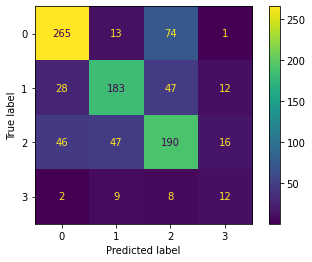

In [23]:
from sklearn.metrics import plot_confusion_matrix
Y_pred1 = clf.predict(X_test)
print (confusion_matrix(Y_test, Y_pred1))
print (classification_report (Y_test, Y_pred1))
plot_confusion_matrix(clf, X_test, Y_test);

In [24]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, metric ='hamming',n_jobs=-1)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Minimum error:- 0.24554039874081846 at K = 1


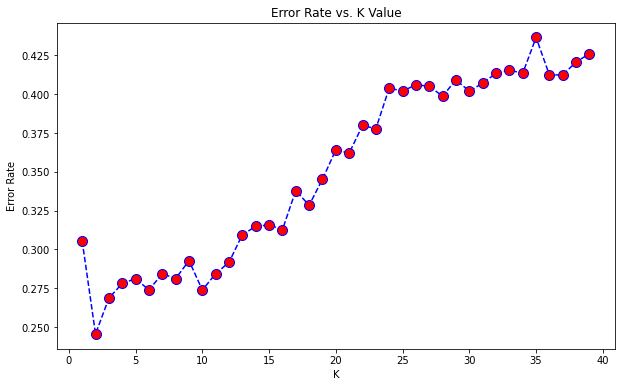

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [26]:
def best_model(X, Y, models):
    results = {}
    for number, model in models.items():
      if number == 'Logistic regression':
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
      scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
      results[number] = scores.mean()

    best = max(results, key=results.get)
    return best, results

models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic regression': LogisticRegression(max_iter=1000),
    'Decision tree': DecisionTreeClassifier()
}

best, results = best_model(X_train, Y_train, models)

print("Model results:")
for model, score in results.items():
    print(f"{model}: {score}")

print(f"\nThe best model is: {best}")

Model results:
Random Forest: 0.9428100157205119
Logistic regression: 0.798272119654768
Decision tree: 0.9302184703976224

The best model is: Random Forest


# Random Forest

Train set score (Accuracy) = 0.8051
Test set score (Accuracy) = 0.6821
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       353
           1       0.85      0.76      0.80       270
           2       0.70      0.87      0.77       299
           3       0.00      0.00      0.00        31

    accuracy                           0.82       953
   macro avg       0.62      0.63      0.62       953
weighted avg       0.80      0.82      0.81       953



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-d

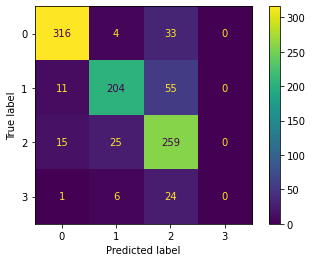

In [27]:
clf1 = RandomForestClassifier(max_depth=2, random_state=0)
clf1.fit(X_train,Y_train)
Y_pred = clf1.predict(X_test)
print("Train set score (Accuracy) =", clf1.score(X_train, Y_train).round(4))
print("Test set score (Accuracy) =", clf.score(X_test, Y_test).round(4))


print(classification_report(Y_test, clf1.predict(X_test)))


from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.show()

In [28]:
Y_pred = np.round(Y_pred).astype(int) 
print('MSE:', mean_squared_error(Y_test,Y_pred))
knn_accuary = accuracy_score(Y_test,Y_pred)
print("Accuary: %f" % knn_accuary)
precision = precision_score(Y_test,Y_pred, average = 'micro')
print('Precision: %f' % precision)  
recall = recall_score(Y_test,Y_pred, average = 'micro')
print('Recall: %f' % recall)
f1 = f1_score(Y_test,Y_pred, average = 'micro')
print('F1 score: %f' % f1)
mcc = matthews_corrcoef(Y_test,Y_pred)
print('mcc: %f' % mcc)
r2 = r2_score(Y_test,Y_pred)
print('r2 score: %f' % r2)

MSE: 0.36096537250786986
Accuary: 0.817419
Precision: 0.817419
Recall: 0.817419
F1 score: 0.817419
mcc: 0.733372
r2 score: 0.556663


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)

y_pred = rf_classifier.predict(X_test)
 
accuracy = accuracy_score(Y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9485834207764953


# Bagging Classifier

In [30]:
from sklearn.ensemble import BaggingClassifier
clf2 = BaggingClassifier().fit(X_train,Y_train)

In [31]:
Y_pred2 = clf2.predict(X_test)

[[325   2   5   0]
 [  1 291  17   6]
 [  4   7 271   0]
 [  0   2   1  21]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       332
           1       0.96      0.92      0.94       315
           2       0.92      0.96      0.94       282
           3       0.78      0.88      0.82        24

    accuracy                           0.95       953
   macro avg       0.91      0.93      0.92       953
weighted avg       0.95      0.95      0.95       953



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


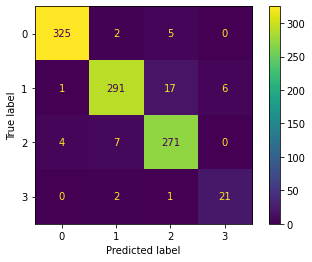

In [32]:
from sklearn.metrics import plot_confusion_matrix
Y_pred2 = clf2.predict(X_test)
print (confusion_matrix(Y_test, Y_pred2))
print (classification_report (Y_test, Y_pred2))
plot_confusion_matrix(clf2, X_test, Y_test);

In [33]:
Y_pred2 = np.round(Y_pred2).astype(int) 
print('MSE:', mean_squared_error(Y_test,Y_pred2))
knn_accuary = accuracy_score(Y_test,Y_pred2)
print("Accuary: %f" % knn_accuary)
precision = precision_score(Y_test,Y_pred2, average = 'micro')
print('Precision: %f' % precision)  
recall = recall_score(Y_test,Y_pred2, average = 'micro')
print('Recall: %f' % recall)
f1 = f1_score(Y_test,Y_pred2, average = 'micro')
print('F1 score: %f' % f1)
mcc = matthews_corrcoef(Y_test,Y_pred2)
print('mcc: %f' % mcc)
r2 = r2_score(Y_test,Y_pred2)
print('r2 score: %f' % r2)

MSE: 0.10073452256033578
Accuary: 0.952781
Precision: 0.952781
Recall: 0.952781
F1 score: 0.952781
mcc: 0.931073
r2 score: 0.864788
